- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [2]:
import pandas as pd

In [3]:
# не меняем путь!
PATH = 'https://github.com/aksenov7/Kaggle_competition_group/blob/master/athlete_events.csv.zip?raw=true'

__0. Откройте файл используя необходимые параметры и не меняя переменную PATH__

In [5]:
data = pd.read_csv(PATH, compression='zip')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


__1. Сколько лет было самым молодым мужчинам и женщинам-участникам Олимпийских игр 1992 года ?__
- 16 и 15
- 14 и 13 
- 13 и 11
- 11 и 12

In [11]:
print(
    'Самому молодому мужчине было: ',
    data[(data['Year'] == 1992) & (data['Sex'] == 'M')]['Age'].min())

print(
    'Самой молодой женщине было: ',
    data[(data['Year'] == 1992) & (data['Sex'] == 'F')]['Age'].min())

Самому молодому мужчине было:  11.0
Самой молодой женщине было:  12.0


__2. Каков был процент баскетболистов-мужчин среди всех мужчин-участников Олимпийских игр 2012 года? Округлите ответ до первого десятичного знака.__

Здесь и далее при необходимости отбрасывайте дублированных спортсменов, чтобы считать только уникальных . 
- 0.2
- 1.5 
- 2.5
- 7.7

In [58]:
print(
    f"""{len(data[(data['Year'] == 2012) 
             & (data['Sport'] == 'Basketball') 
             & (data['Sex'] == 'M')]) 
    / len(data[(data['Year'] == 2012) & (data['Sex'] == 'M')])
    * 100 : .1f}""", 
    "%")

 2.0 %


__3. Каковы среднее и стандартное отклонение роста теннисисток, участвовавших в Олимпийских играх 2000 года? Округлите ответ до первого десятичного знака.__

- 171.8 и 6.5
- 179.4 и 10
- 180.7 и 6.7
- 182.4 и 9.1 

In [27]:
print(
    "Среднее: ",
    f"""{data[(data['Year'] == 2000) 
         & (data['Sport'] == 'Tennis') 
         & (data['Sex'] == 'F')]['Height'].mean():.1f}""")
print(
    "Стандартное отклонение: ",
    f"""{data[(data['Year'] == 2012) 
         & (data['Sport'] == 'Tennis') 
         & (data['Sex'] == 'F')]['Height'].std():.1f}""")

Среднее:  171.8
Стандартное отклонение:  6.2


__4. Найдите спортсмена, который участвовал в Олимпийских играх 2006 года, с наибольшим весом среди других участников той же Олимпиады. Каким спортом он или она занимался?__

- Judo
- Bobsleigh 
- Skeleton
- Boxing

In [36]:
(data[data['Year'] == 2006]
    .sort_values('Weight', ascending=False)
    .iloc[0]['Sport'])

'Skeleton'

__5. Сколько раз John Aalberg участвовал в Олимпийских играх в разные годы?__

Один год - это один раз. Неважно сколько участий внутри одного года
- 0
- 1 
- 2
- 3 

In [44]:
name = 'John Aalberg'
len(data[data['Name'] == name].drop_duplicates(['Year']))

2

__6. Сколько золотых медалей по теннису выиграли спортсмены сборной Switzerland на Олимпиаде-2008? Считайте каждую медаль от каждого спортсмена.__

- 0
- 1 
- 2
- 3 

In [49]:
len(data[(data['Sport'] == 'Tennis')
         & (data['Year'] == 2008) 
         & (data['Team'] == 'Switzerland') 
         & (data['Medal'] == 'Gold')])

2

__7. Правда ли, что на Олимпийских играх 2016 Spain выиграла меньше медалей, чем Италия?__ 

- Да
- Нет

In [54]:
import numpy as np

(len(data[(data['Year'] == 2016)
         & (data['Team'] == 'Spain')
         & (data['Medal'] is not np.nan)]) 
<
len(data[(data['Year'] == 2016)
         & (data['Team'] == 'Italy')
         & (data['Medal'] is not np.nan)]))

True

__8. К какой возрастной категории принадлежало наименьшее и наибольшее количество участников Олимпиады-2008?__

- [45-55] и [25-35) соответственно
- [45-55] и [15-25) соответственно
- [35-45) и [25-35) соответственно
- [45-55] и [35-45) соответственно

[20-25] - наибольшее
[45-55] - наименьшее


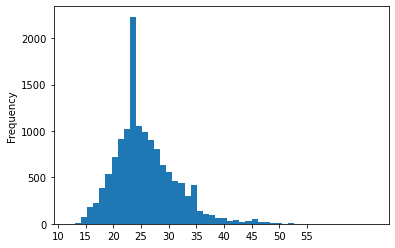

In [70]:
data[data['Year'] == 2008]['Age'].plot(bins=50, kind='hist', xticks=range(10, 60, 5))

print("[15-25] - наибольшее")
print("[45-55] - наименьшее")

__9. Правда ли, что в Atlanta проводились летние Олимпийские игры? Правда ли, что в Squaw Valley проводились зимние Олимпийские игры? ?__

- Да, Да
- Да, Нет
- Нет, Да 
- Нет, Нет 

In [84]:
print("Проводились ли игры в городе 'Atlanta': ", not data[data['City'] == 'Atlanta'].empty)
print("Проводились ли игры в городе 'Squaw Valley': ", not data[data['City'] == 'Squaw Valley'].empty)

Проводились ли игры в городе 'Atlanta':  True
'Squaw Valley' is missing:  True


__10. Какова абсолютная разница между количеством уникальных видов спорта на Олимпиаде 1986 года и Олимпиаде 2002 года?__

- 3 
- 10
- 15
- 27 

In [92]:
abs(
    len(data[data['Year'] == 1986]['Sport'].drop_duplicates())
    -
    len(data[data['Year'] == 2002]['Sport'].drop_duplicates()))


15